# 1. Написать программу, оценивающую значение машинного эпсилон для стандартных чисел с двойной точностью.

In [1]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
eps = 1

while 1 + eps/2 != 1:
    eps = eps/2
print ('value machine epsilon is', eps)

value machine epsilon is 2.220446049250313e-16


# 2. Привести пример функции, производную которой нельзя вычислить методом дифференцирования с комплексным шагом.

# 3. Релизовать алгоритм вычисления первой производной методом дифференцирования с комплексным шагом. Для функции с известным значением производной, изучить сходимость численного ответа при уменьшении шага.

### Формулой будет являться: $$
f'(x) = \frac{ \mathrm{Im}\,f(x+ih) }{h} + O(h^2)
$$

Возьмём кое-что отсюда: https://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/ (почти всё, только на Питоне)


<IPython.core.display.Javascript object>


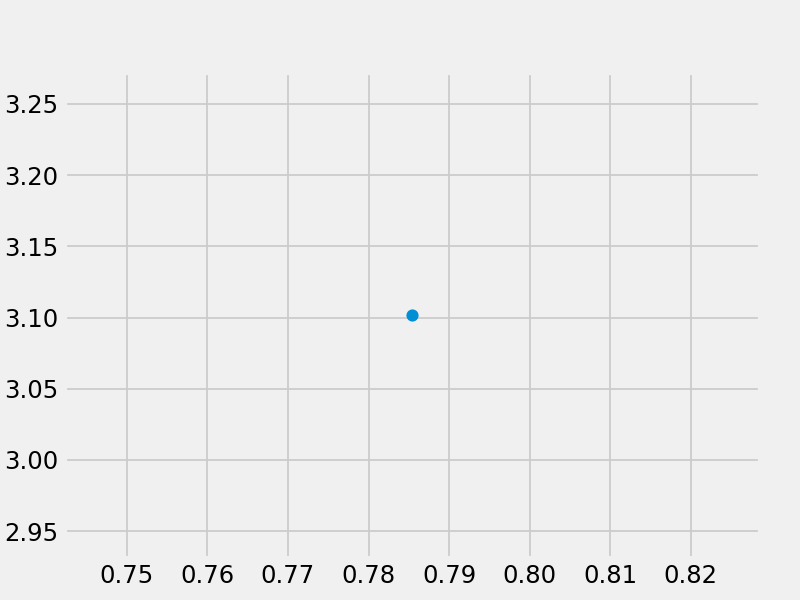

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [3]:
import cmath

h = 10**(-8)
def f_complex (x):
    f_x = cmath.exp (x) / ((cmath.cos(x))**3 + (cmath.sin(x))**3)
    return f_x 
def f_complex_1 (x):
    f_x = f_complex (x) #(math.e(x)*(math.cos(3*x) + math.sin(3*x)/2 + (3*math.sin(x))/2))/(math.cos(x)**3 + math.sin(x)**3)**2 
    # 2**(1/2)*math.e**(math.pi/4)
    return f_x 

def f_complex_der (x,h):
    z = f_complex(x + h*1j) 
    f_x_der = z.imag/h
    return f_x_der 

xx = np.linspace(-cmath.pi/4, cmath.pi/2, num=80)
# plt.plot(xx, [f_complex(x) for x in xx])    
plt.plot (cmath.pi/4, f_complex (cmath.pi/4), 'o-')



Окей, выбрали функцию, нарисовали график - пора наконец и производную найти :) 


Вычислить $$f'(x) = \frac{ \mathrm{Im}\,f(x+ih) }{h} + O(h^2)$$


In [4]:
def f_complex_der (x,h):
    z = f_complex(x + h*1j) #x + hj
    f_x_der = z.imag/h
    return f_x_der 
print (f_complex_der(cmath.pi/4,h))

3.101766393836051


As for now, it works!!!!!.


$$F(x) = x^2$$ - great and simple 


In [5]:
h = 10**(-8)
def f_complex (x):
    f_x = x **x*3
    print (f_x)
    return f_x 
def f_complex_der (x,h):
    z = f_complex(x + h*1j) #x + hj
    print(z)
    f_x_der = z.imag/h
    return f_x_der 
print ('Derrivative is ',f_complex_der(1,h))

(3+3.0000000000000004e-08j)
(3+3.0000000000000004e-08j)
Derrivative is  3.0000000000000004


Coool, it's work!!!